## Covid data analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from matplotlib.font_manager import FontProperties

### Importing Covid19 dataset

In [87]:
covid_data= pd.read_csv("covid19.csv")
covid_data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
1,Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68
2,Arunachal Pradesh,45703,4465,41025,213,9.77,89.76,0.47
3,Assam,557437,15726,536597,5114,2.82,96.26,0.92
4,Bihar,72439075,530,714223,9637,0.07,98.60,1.33


### The size of the data

In [88]:
covid_data.shape

(36, 8)

#### Covid data has 36 records

### List down the columns of the dataset to check all columns are relevant with proper names

In [89]:
covid_data.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

### Rename the columns names

In [90]:
covid_data.rename(columns={"State/UTs":"State"},inplace=True)

In [91]:
covid_data

,State,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
1,Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68
2,Arunachal Pradesh,45703,4465,41025,213,9.77,89.76,0.47
3,Assam,557437,15726,536597,5114,2.82,96.26,0.92
4,Bihar,72439075,530,714223,9637,0.07,98.60,1.33
5,Chandigarh,61922,32,61081,809,0.05,98.64,1.31
6,Chhattisgarh,1001037,2789,984737,13511,0.28,98.37,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10637,48,10585,4,0.45,99.51,0.04
8,Delhi,1435844,587,1410216,25041,0.04,98.22,1.74
9,Goa,170416,1238,166052,3126,0.73,97.44,1.83


### Checking null values¶

In [92]:
covid_data.isna().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
dtype: bool

### Drop null values

In [93]:
covid_data=covid_data.dropna(how="all")
covid_data

,State,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
1,Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68
2,Arunachal Pradesh,45703,4465,41025,213,9.77,89.76,0.47
3,Assam,557437,15726,536597,5114,2.82,96.26,0.92
4,Bihar,72439075,530,714223,9637,0.07,98.60,1.33
5,Chandigarh,61922,32,61081,809,0.05,98.64,1.31
6,Chhattisgarh,1001037,2789,984737,13511,0.28,98.37,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10637,48,10585,4,0.45,99.51,0.04
8,Delhi,1435844,587,1410216,25041,0.04,98.22,1.74
9,Goa,170416,1238,166052,3126,0.73,97.44,1.83


In [94]:
covid_data.shape

(36, 8)

### Checking data type of each column

In [95]:
covid_data.dtypes

State                   object
Total Cases              int64
Active                   int64
Discharged               int64
Deaths                   int64
Active Ratio (%)       float64
Discharge Ratio (%)    float64
Death Ratio (%)        float64
dtype: object

### Making State column as Index

In [96]:
covid_data_statewise = covid_data.set_index("State")
covid_data_statewise

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
State,,,,,,,
Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68
Arunachal Pradesh,45703,4465,41025,213,9.77,89.76,0.47
Assam,557437,15726,536597,5114,2.82,96.26,0.92
Bihar,72439075,530,714223,9637,0.07,98.60,1.33
Chandigarh,61922,32,61081,809,0.05,98.64,1.31
Chhattisgarh,1001037,2789,984737,13511,0.28,98.37,1.35
Dadra and Nagar Haveli and Daman and Diu,10637,48,10585,4,0.45,99.51,0.04
Delhi,1435844,587,1410216,25041,0.04,98.22,1.74


In [97]:
covid_data_statewise.shape

(36, 7)

### Visualising data related to a state for example Kerala



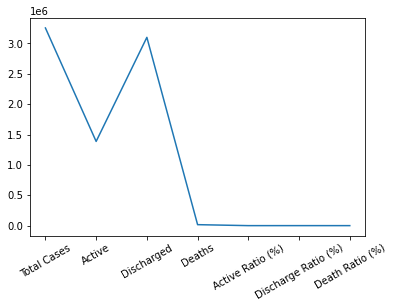

In [99]:
covid_data_statewise.loc["Kerala"].plot()
plt.xticks(rotation=30)
plt.show()

### Visualising data related to multiple states, for example Kerala, Delhi and Tamil Nadu.

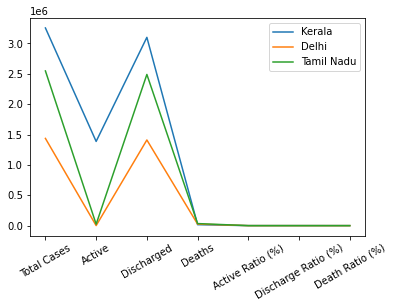

In [100]:
covid_data_statewise.loc["Kerala"].plot()
covid_data_statewise.loc["Delhi"].plot()
covid_data_statewise.loc["Tamil Nadu"].plot()
plt.xticks(rotation=30)
plt.legend()
plt.show()


### Highest death rate

In [107]:
covid_data_statewise.sort_values("Deaths",ascending=False).head(1)

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
State,,,,,,,
Maharashtra,6258079,96833,6029817,131429,1.55,96.35,2.1


#### Mharashtra has the highest death rate

### Representing the statewise deaths in a bar chart

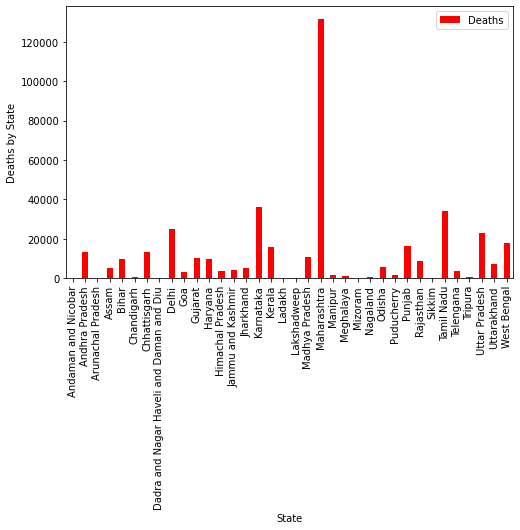

In [116]:
covid_data_statewise[["Deaths"]].plot.bar(color=["red"],figsize=(8,5))
plt.ylabel("Deaths by State")
plt.show()

#### from the graph it is clear that, Maharashtra has the highest death rate

### Lowest death rate 

In [117]:
covid_data_statewise.sort_values("Deaths",ascending=False).tail(1)

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
State,,,,,,,
Dadra and Nagar Haveli and Daman and Diu,10637,48,10585,4,0.45,99.51,0.04


#### Dadra and Nagar Haveli and Daman and Diu has the lowest death rate 

### Active vs Death comparison among the top 10 states that  has the highest covid cases

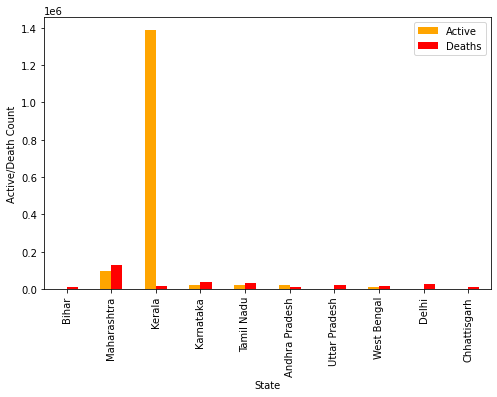

In [142]:
covid_data_topten = covid_data_statewise.sort_values("Total Cases",ascending=False).head(10)
covid_data_topten[["Active","Deaths"]].plot.bar(color=["orange","red"],figsize=(8,5))
plt.ylabel("Active/Death Count")
plt.show()

#### from the plot,  Kerala has the highest active cases, but with low death rates

In [146]:
covid_data_topten.sort_values("Death Ratio (%)",ascending=True).head(1)

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
State,,,,,,,
Kerala,3254064,1386262,3099469,15969,4.26,95.25,0.49


#### if we sort the death ratio of the top ten states,  we can see that Kerala has the lowest death ratio

### Death  percentage in top ten states

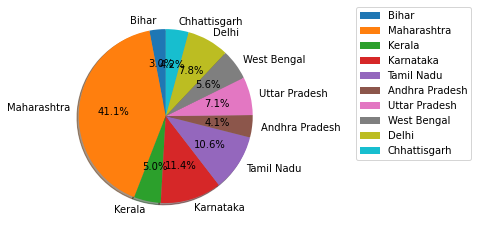

In [169]:
covid_data_topten.plot(kind='pie', y='Deaths',shadow = True,startangle=90,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.35,1.025), loc="upper left")
plt.axes().set_ylabel('')
plt.show()

#### From the above graph we can understand that Maharashtra has the heighest death.

### Representing Discharged cases among top ten states

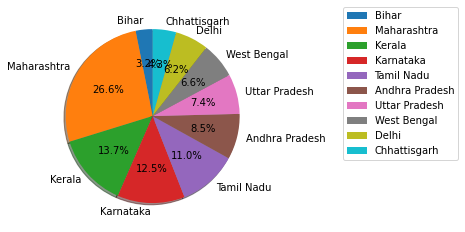

In [192]:

covid_data_topten[["Discharged"]].plot(kind='pie', subplots=True, shadow = True,startangle=90,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.35,1.025), loc="upper left")
plt.axes().set_ylabel('')
plt.show()


#### Maharashtra has the heighest discharged cases as well among the top 10

### Representing Active cases among top 10 states

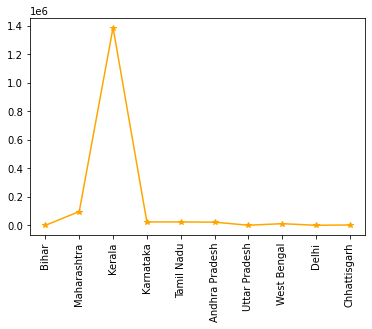

In [198]:
y=covid_data_topten.Active
plt.plot(y,marker='*',color='orange')
plt.xticks(rotation=90)
plt.show()

#### From the graph it is clear that kerala has the heigest active cases.

## Summary
   

### From the analysis it can be noticed that:
             1.   Kerala has the highest active cases, however,  the death rate is the lowest
             2.   Maharashtra has the highest death rate, however, the active cases are coming down.
                  They also have the highest discharged cases.